In [1]:
#Importation des libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [4]:
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_regression

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Charger le fichier CSV dans un DataFrame
X_dt = pd.read_csv("X_train.csv",sep=",")
Y_dt = pd.read_csv("y_train.csv",sep=",")

In [19]:
Y_dt.head(10)

,DELIVERY_START,spot_id_delta
0,2022-01-01 02:00:00+01:00,-36.874770
1,2022-01-01 03:00:00+01:00,-12.643588
2,2022-01-01 04:00:00+01:00,-1.950193
3,2022-01-01 05:00:00+01:00,1.938272
4,2022-01-01 06:00:00+01:00,0.199907
5,2022-01-01 07:00:00+01:00,-0.943992
6,2022-01-01 08:00:00+01:00,-2.770881
7,2022-01-01 09:00:00+01:00,-17.576596
8,2022-01-01 10:00:00+01:00,-12.352031
9,2022-01-01 11:00:00+01:00,-15.489499


In [7]:
data_train = pd.merge(Y_dt, X_dt, on="DELIVERY_START")
data_train.sort_values(['DELIVERY_START'],inplace=True)


In [10]:
data_train.head(10)

,DELIVERY_START,spot_id_delta,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2022-01-01 01:00:00+00:00,-36.874770,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,NaN
1,2022-01-01 02:00:00+00:00,-12.643588,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,NaN
2,2022-01-01 03:00:00+00:00,-1.950193,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,NaN
3,2022-01-01 04:00:00+00:00,1.938272,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,NaN
4,2022-01-01 05:00:00+00:00,0.199907,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,NaN
5,2022-01-01 06:00:00+00:00,-0.943992,45648.0,3386.0,11487.0,44118.0,3902.0,0.0,27.624052,0.000000,NaN
6,2022-01-01 07:00:00+00:00,-2.770881,45909.0,3386.0,11487.0,44118.0,4092.0,198.0,44.944701,6.195349,NaN
7,2022-01-01 08:00:00+00:00,-17.576596,47091.0,3386.0,11487.0,44118.0,4315.0,1012.0,30.505330,23.239957,NaN
8,2022-01-01 09:00:00+00:00,-12.352031,48300.0,3386.0,11487.0,44118.0,4436.0,2401.0,35.835910,44.450154,NaN
9,2022-01-01 10:00:00+00:00,-15.489499,49559.0,3386.0,11487.0,44118.0,4459.0,3699.0,57.670945,53.426489,NaN


In [9]:
# Convertir la colonne DELIVERY_START en format datetime en utilisant utc=True
data_train['DELIVERY_START'] = pd.to_datetime(data_train['DELIVERY_START'], utc=True)

In [62]:
data_train.head(10)

,DELIVERY_START,spot_id_delta,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std
0,2022-01-01 01:00:00+00:00,-36.874770,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000
1,2022-01-01 02:00:00+00:00,-12.643588,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000
2,2022-01-01 03:00:00+00:00,-1.950193,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000
3,2022-01-01 04:00:00+00:00,1.938272,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000
4,2022-01-01 05:00:00+00:00,0.199907,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000
5,2022-01-01 06:00:00+00:00,-0.943992,3386.0,11487.0,44118.0,3902.0,0.0,27.624052,0.000000
6,2022-01-01 07:00:00+00:00,-2.770881,3386.0,11487.0,44118.0,4092.0,198.0,44.944701,6.195349
7,2022-01-01 08:00:00+00:00,-17.576596,3386.0,11487.0,44118.0,4315.0,1012.0,30.505330,23.239957
8,2022-01-01 09:00:00+00:00,-12.352031,3386.0,11487.0,44118.0,4436.0,2401.0,35.835910,44.450154
9,2022-01-01 10:00:00+00:00,-15.489499,3386.0,11487.0,44118.0,4459.0,3699.0,57.670945,53.426489


In [11]:
data_train.drop(['load_forecast','predicted_spot_price'],axis=1,inplace=True)

In [12]:
# Créer un imputer IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0, sample_posterior=True)

# Sélectionner les colonnes à imputer
columns_to_impute = ['wind_power_forecasts_average',
                                                    'solar_power_forecasts_average','wind_power_forecasts_std',
                                                    'solar_power_forecasts_std']

# Imputer les colonnes spécifiées
data_imputed = data_train.copy()  # Créer une copie pour éviter de modifier l'original

# Imputer les colonnes spécifiées
data_imputed[columns_to_impute] = imputer.fit_transform(data_imputed[columns_to_impute])

data_imputed=data_imputed.dropna()

In [8]:
data_imputed.set_index('DELIVERY_START', inplace=True)

In [13]:
data_reg=data_imputed.drop(['coal_power_available','solar_power_forecasts_std'],axis=1)

In [23]:
data_reg.head(10)

,DELIVERY_START,spot_id_delta,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std
0,2022-01-01 01:00:00+00:00,-36.874770,11487.0,44118.0,3035.0,0.0,79.248348
1,2022-01-01 02:00:00+00:00,-12.643588,11487.0,44118.0,3143.0,0.0,61.776532
2,2022-01-01 03:00:00+00:00,-1.950193,11487.0,44118.0,3288.0,0.0,44.291112
3,2022-01-01 04:00:00+00:00,1.938272,11487.0,44118.0,3447.0,0.0,36.127588
4,2022-01-01 05:00:00+00:00,0.199907,11487.0,44118.0,3679.0,0.0,30.983023
5,2022-01-01 06:00:00+00:00,-0.943992,11487.0,44118.0,3902.0,0.0,27.624052
6,2022-01-01 07:00:00+00:00,-2.770881,11487.0,44118.0,4092.0,198.0,44.944701
7,2022-01-01 08:00:00+00:00,-17.576596,11487.0,44118.0,4315.0,1012.0,30.505330
8,2022-01-01 09:00:00+00:00,-12.352031,11487.0,44118.0,4436.0,2401.0,35.835910
9,2022-01-01 10:00:00+00:00,-15.489499,11487.0,44118.0,4459.0,3699.0,57.670945


In [28]:
# Séparer les features et la cible
X = data_reg.drop(columns='spot_id_delta')

y = data_reg['spot_id_delta']

In [30]:
#X.set_index('DELIVERY_START', inplace=True)
X=X.drop(columns='DELIVERY_START')
X.head(10)

,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std
0,11487.0,44118.0,3035.0,0.0,79.248348
1,11487.0,44118.0,3143.0,0.0,61.776532
2,11487.0,44118.0,3288.0,0.0,44.291112
3,11487.0,44118.0,3447.0,0.0,36.127588
4,11487.0,44118.0,3679.0,0.0,30.983023
5,11487.0,44118.0,3902.0,0.0,27.624052
6,11487.0,44118.0,4092.0,198.0,44.944701
7,11487.0,44118.0,4315.0,1012.0,30.505330
8,11487.0,44118.0,4436.0,2401.0,35.835910
9,11487.0,44118.0,4459.0,3699.0,57.670945


In [63]:
y.head(10)

0   -36.874770
1   -12.643588
2    -1.950193
3     1.938272
4     0.199907
5    -0.943992
6    -2.770881
7   -17.576596
8   -12.352031
9   -15.489499
Name: spot_id_delta, dtype: float64

In [51]:
# Diviser les données en ensemble d'entraînement et de test en conservant l'ordre chronologique
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std
0,1.25311,0.565667,3.535485,-0.121961,-0.056248
1,1.25311,0.565667,3.476206,-0.339831,0.118822
2,1.25311,0.565667,3.402024,-0.576819,0.623555
3,1.25311,0.565667,3.331154,-0.692608,0.888762
4,1.25311,0.565667,3.261278,-0.723629,0.424147
5,1.25311,0.565667,3.282804,-0.723629,0.461390
6,1.25311,0.565667,3.284460,-0.723629,0.747266
7,1.25311,0.565667,3.243395,-0.723629,0.537660
8,1.25311,0.565667,3.270219,-0.723629,0.043784
9,1.25311,0.565667,3.321550,-0.723629,-0.075491


In [57]:
X_test_scaled.head(10)

,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std
0,1.25311,0.565667,3.535485,-0.121961,-0.056248
1,1.25311,0.565667,3.476206,-0.339831,0.118822
2,1.25311,0.565667,3.402024,-0.576819,0.623555
3,1.25311,0.565667,3.331154,-0.692608,0.888762
4,1.25311,0.565667,3.261278,-0.723629,0.424147
5,1.25311,0.565667,3.282804,-0.723629,0.461390
6,1.25311,0.565667,3.284460,-0.723629,0.747266
7,1.25311,0.565667,3.243395,-0.723629,0.537660
8,1.25311,0.565667,3.270219,-0.723629,0.043784
9,1.25311,0.565667,3.321550,-0.723629,-0.075491


In [41]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Entraînement du modèle
    model.fit(X_train, y_train)
    
    # Prédiction sur les données de test
    y_pred = model.predict(X_test)
    
    # Calcul des métriques
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model.__class__.__name__} -> MSE: {mse}, R²: {r2}")
    return mse, r2

regression

In [58]:
evaluate_model(rf, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

NameError: name 'y_train_scaled' is not defined

In [55]:
lr = LinearRegression()
evaluate_model(lr, X_train_scaled, y_train, X_test_scaled, y_test)

LinearRegression -> MSE: 291.925844606084, R²: -0.05993617806684437


(np.float64(291.925844606084), -0.05993617806684437)

Lasso

In [56]:
lasso = Lasso(alpha=0.1)
evaluate_model(lasso, X_train_scaled, y_train, X_test_scaled, y_test)

Lasso -> MSE: 292.08282225124924, R²: -0.06050613885768463


(np.float64(292.08282225124924), -0.06050613885768463)

ElasticNet

In [44]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
evaluate_model(elasticnet, X_train_scaled, y_train, X_test_scaled, y_test)

ElasticNet -> MSE: 291.8578027468299, R²: -0.05968912892892497


(np.float64(291.8578027468299), -0.05968912892892497)

Random

In [65]:
rf = RandomForestRegressor(n_estimators=100)
evaluate_model(rf, X_train_scaled, y_train, X_test_scaled, y_test)

RandomForestRegressor -> MSE: 495.9369118277746, R²: -0.8006678223174


(np.float64(495.9369118277746), -0.8006678223174)

MLP

In [17]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
evaluate_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

MLPRegressor -> MSE: 432.68713788210226, R²: -0.5710179817901573


(np.float64(432.68713788210226), -0.5710179817901573)

In [ ]:
XGBoost

In [46]:
xgb = XGBRegressor(n_estimators=100)
evaluate_model(xgb, X_train_scaled, y_train, X_test_scaled, y_test)

XGBRegressor -> MSE: 501.2699490651399, R²: -0.8200312298789632


(np.float64(501.2699490651399), -0.8200312298789632)

XGBoost

In [19]:
gbr = GradientBoostingRegressor(n_estimators=100)
evaluate_model(gbr, X_train_scaled, y_train, X_test_scaled, y_test)

GradientBoostingRegressor -> MSE: 385.10689208325493, R²: -0.39826169859240634


(np.float64(385.10689208325493), -0.39826169859240634)

Ajustement Random

In [20]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_rf.fit(X_train_scaled, y_train)

print(f"Meilleurs paramètres: {grid_rf.best_params_}")
evaluate_model(grid_rf.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test)


Meilleurs paramètres: {'max_depth': 10, 'n_estimators': 100}
RandomForestRegressor -> MSE: 305.2988087338817, R²: -0.1084912777572109


(np.float64(305.2988087338817), -0.1084912777572109)

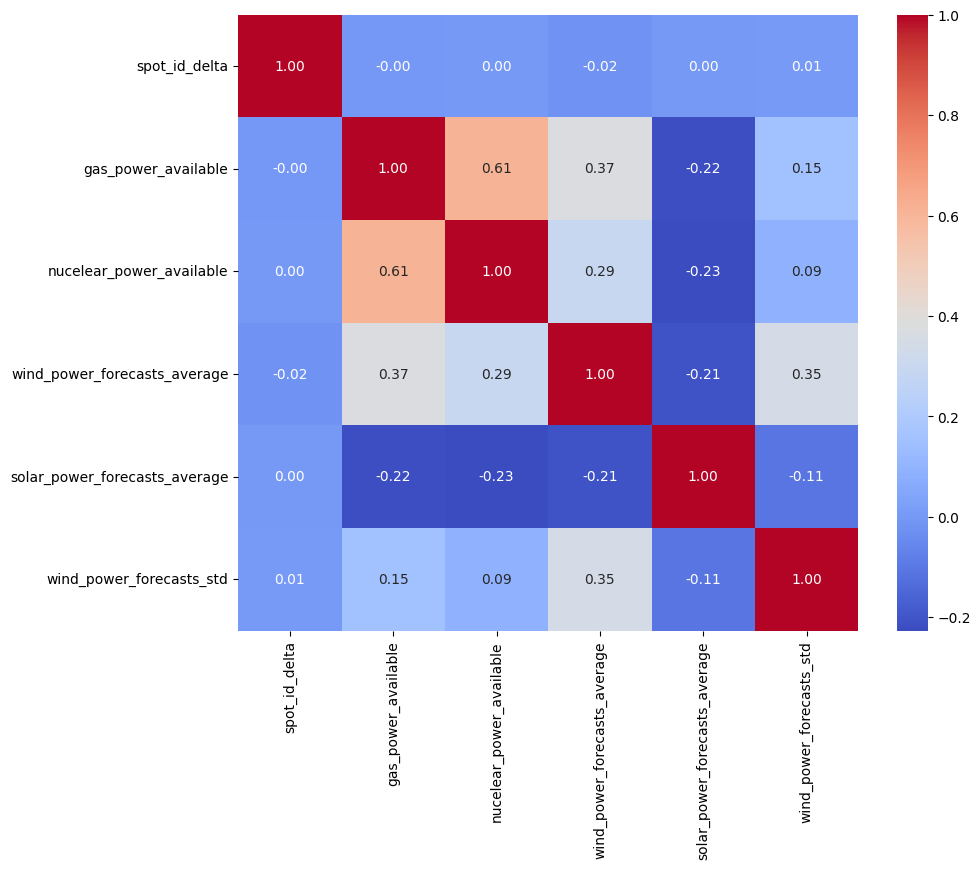

In [21]:
correlation_matrix = data_reg.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

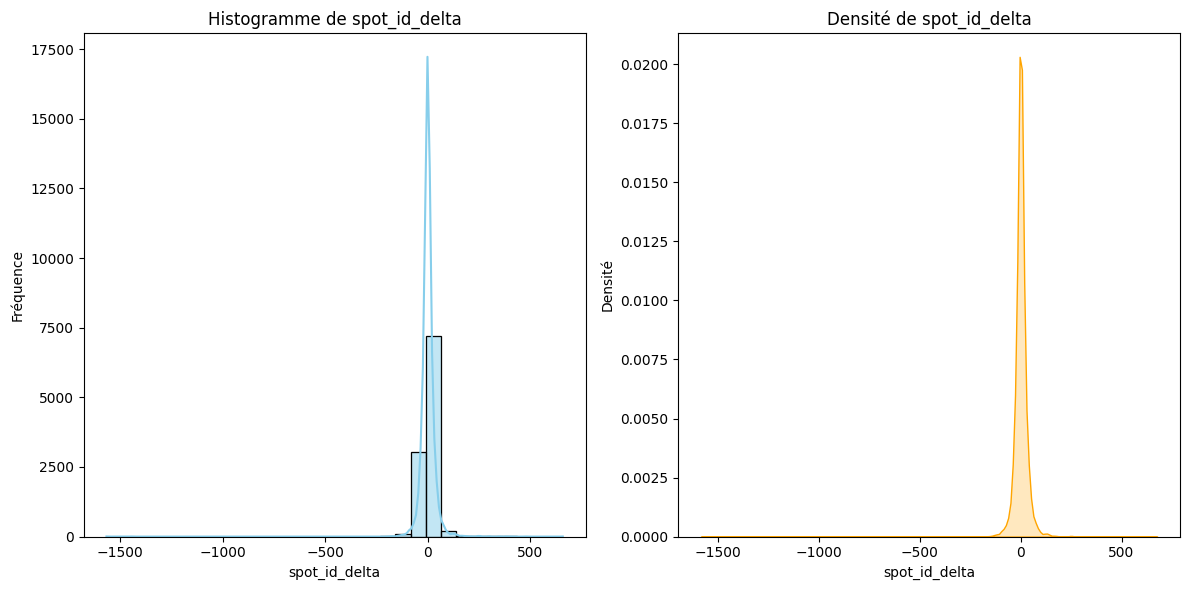

In [22]:
# Paramètres pour les graphiques
plt.figure(figsize=(12, 6))

# Histogramme de la variable cible
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er graphique
sns.histplot(data_reg['spot_id_delta'], bins=30, kde=True, color='skyblue')
plt.title('Histogramme de spot_id_delta')
plt.xlabel('spot_id_delta')
plt.ylabel('Fréquence')

# Tracé de densité
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2ème graphique
sns.kdeplot(data_reg['spot_id_delta'], color='orange', fill=True)
plt.title('Densité de spot_id_delta')
plt.xlabel('spot_id_delta')
plt.ylabel('Densité')

# Afficher les graphiques
plt.tight_layout()
plt.show()

In [23]:
# Analyser les valeurs extrêmes
outliers = data_reg[data_reg['spot_id_delta'] > 500]  # Ajustez la valeur selon votre contexte
print(outliers)

                           spot_id_delta  gas_power_available  \
DELIVERY_START                                                  
2022-07-26 20:00:00+00:00     658.961329              11525.0   

                           nucelear_power_available  \
DELIVERY_START                                        
2022-07-26 20:00:00+00:00                   25582.0   

                           wind_power_forecasts_average  \
DELIVERY_START                                            
2022-07-26 20:00:00+00:00                        3088.0   

                           solar_power_forecasts_average  \
DELIVERY_START                                             
2022-07-26 20:00:00+00:00                            0.0   

                           wind_power_forecasts_std  
DELIVERY_START                                       
2022-07-26 20:00:00+00:00                130.140007  


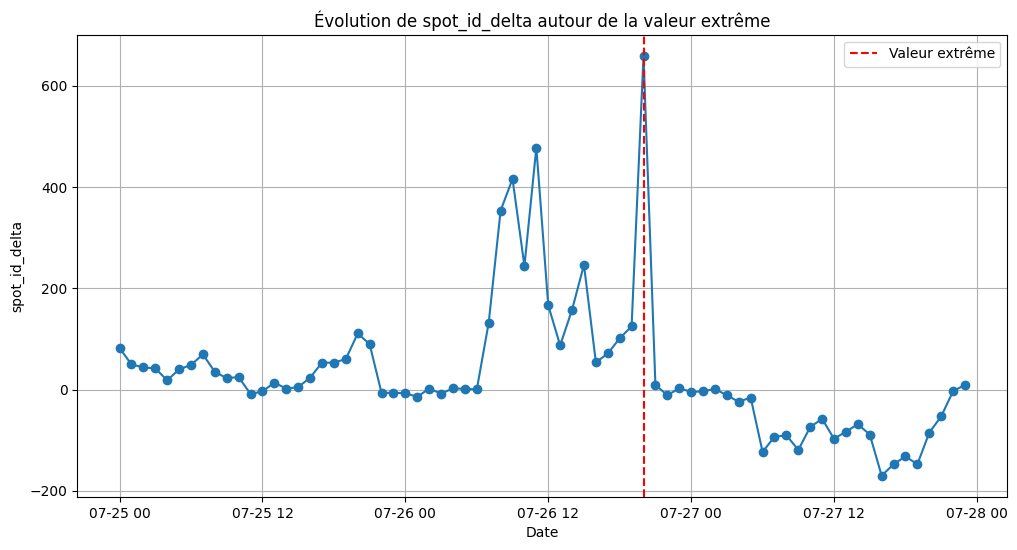

In [24]:
# Filtrer une plage de dates autour de la valeur extrême
date_range = data_reg.loc['2022-07-25':'2022-07-27']
plt.figure(figsize=(12, 6))
plt.plot(date_range.index, date_range['spot_id_delta'], marker='o', linestyle='-')
plt.axvline(x=pd.to_datetime('2022-07-26 20:00:00+00:00'), color='r', linestyle='--', label='Valeur extrême')
plt.title('Évolution de spot_id_delta autour de la valeur extrême')
plt.xlabel('Date')
plt.ylabel('spot_id_delta')
plt.legend()
plt.grid()
plt.show()